In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [27]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [28]:
df = pd.read_csv('houses.csv')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,47.5112,-122.257
1,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,47.7379,-122.233
2,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,47.5208,-122.393
3,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,47.6168,-122.045
4,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,0,1995,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16834,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,47.6993,-122.346
16835,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,47.5107,-122.362
16836,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,47.5944,-122.299
16837,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,47.5345,-122.069


In [29]:
df.shape

(16839, 14)

In [30]:
#remove leading and trailing whitespaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16839 entries, 0 to 16838
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16839 non-null  float64
 1   bedrooms       16839 non-null  int64  
 2   bathrooms      16839 non-null  float64
 3   sqft_living    16839 non-null  int64  
 4   sqft_lot       16839 non-null  int64  
 5   floors         16839 non-null  float64
 6   view           16839 non-null  int64  
 7   condition      16839 non-null  int64  
 8   grade          16839 non-null  int64  
 9   sqft_above     16839 non-null  int64  
 10  sqft_basement  16839 non-null  int64  
 11  yr_built       16839 non-null  int64  
 12  lat            16839 non-null  float64
 13  long           16839 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.8 MB


In [32]:
df.duplicated().sum()

0

In [33]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
price,16839.0,450965.052616,192712.562866,82000.0000,302000.00000,415000.0000,564500.0000,1.170000e+06
bedrooms,16839.0,3.264327,0.801415,1.0000,3.00000,3.0000,4.0000,5.000000e+00
bathrooms,16839.0,1.990676,0.664865,0.0000,1.50000,2.0000,2.5000,4.000000e+00
sqft_living,16839.0,1863.485361,667.373897,370.0000,1360.00000,1780.0000,2290.0000,4.160000e+03
sqft_lot,16839.0,8268.770830,6265.909560,520.0000,4875.00000,7228.0000,9600.0000,4.384700e+04
floors,16839.0,1.472831,0.541941,1.0000,1.00000,1.0000,2.0000,3.000000e+00
view,16839.0,0.013956,0.117311,0.0000,0.00000,0.0000,0.0000,1.000000e+00
condition,16839.0,3.419146,0.645674,2.0000,3.00000,3.0000,4.0000,5.000000e+00
grade,16839.0,7.445216,0.946082,5.0000,7.00000,7.0000,8.0000,1.000000e+01
sqft_above,16839.0,1633.616367,654.666493,370.0000,1150.00000,1460.0000,2000.0000,3.810000e+03


In [34]:
# Summary statistics for categorical features
#categorical_features = df.select_dtypes(include=[object])
#cat_summary_stats = categorical_features.describe().T
#html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

#display(HTML(html_categorical ))

In [35]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
view,0
condition,0
grade,0
sqft_above,0


In [36]:
df.nunique()

price            3153
bedrooms            5
bathrooms          16
sqft_living       700
sqft_lot         7657
floors              5
view                2
condition           4
grade               6
sqft_above        679
sqft_basement     177
yr_built          116
lat              4750
long              559
dtype: int64

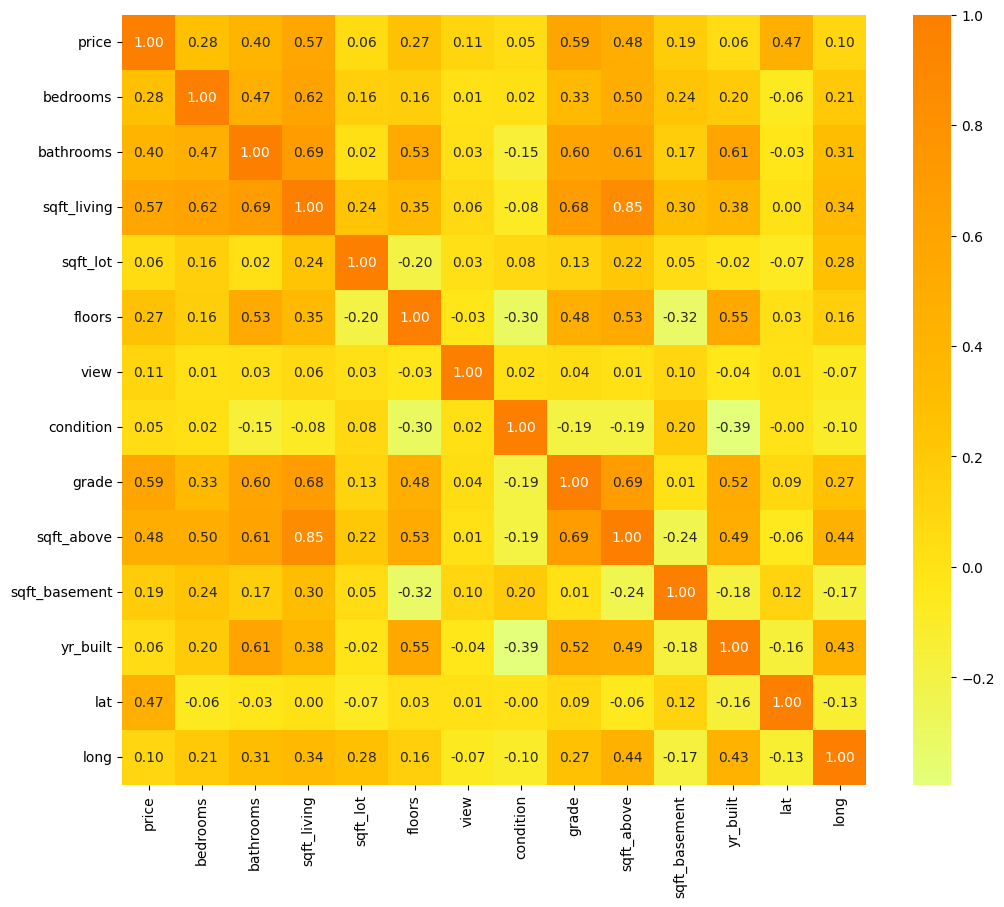

In [37]:
corelation=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corelation, annot=True, fmt='.2f', cmap='Wistia')
plt.show()

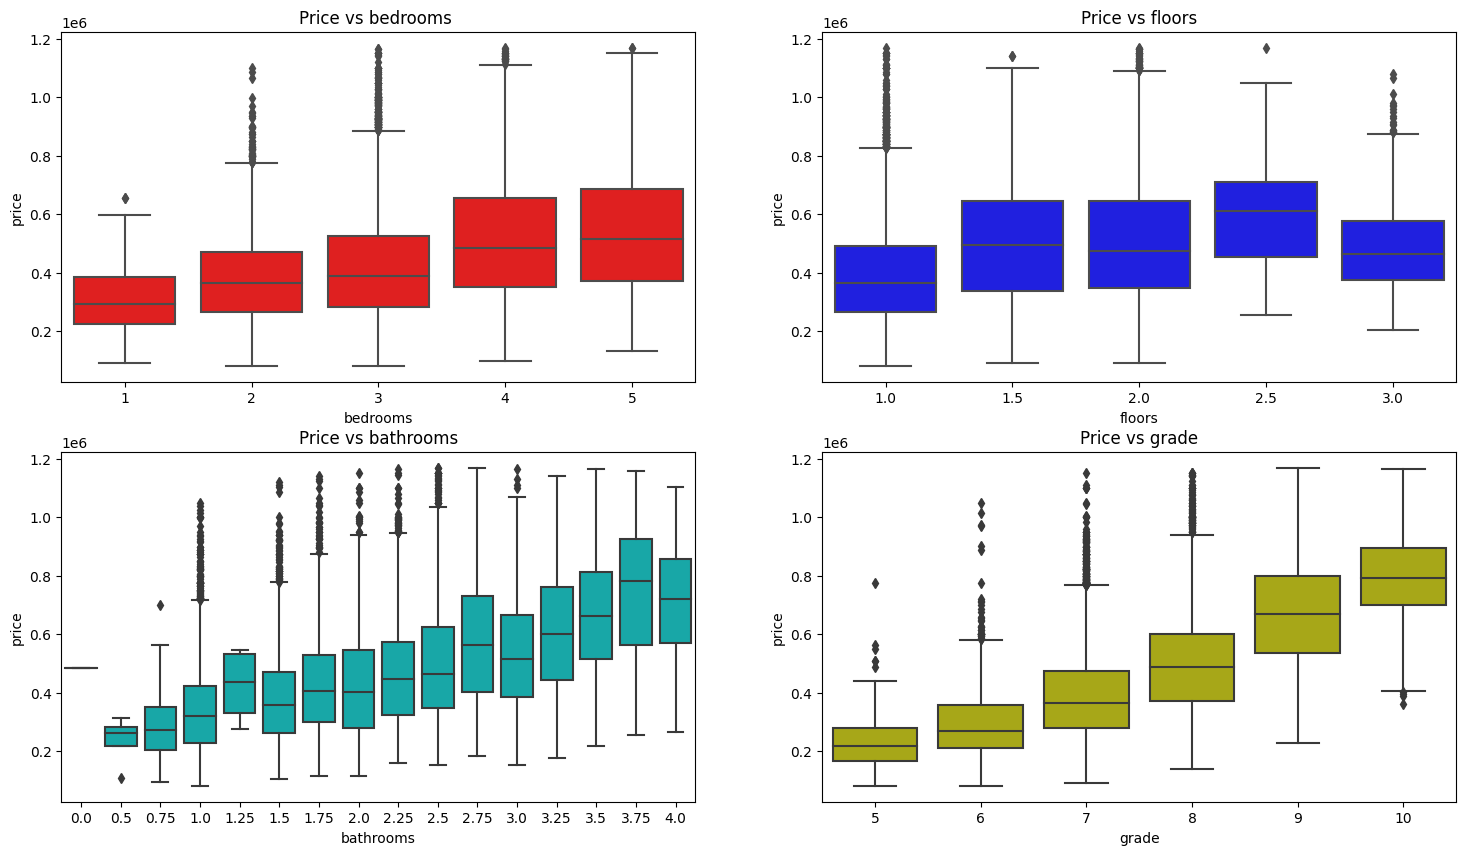

In [38]:
# check the percentile and median base distribution(For visulaising the outliers)
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=df, x=df["bedrooms"], y=df["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=df, x=df["floors"], y=df["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=df, x=df["bathrooms"], y=df["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=df, x=df["grade"], y=df["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")

plt.show()

In [39]:
columns=df.columns.to_list()
outliers=[]

for col in columns:
    #print(col)
    mean=np.mean(df[col])
    std=np.std(df[col])
    for i in range(len(df)):
        item = df[col].iloc[i]
        z_score=(item-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)

outliers = set(outliers)
outliers = list(outliers)

In [40]:
ratio= len(outliers)/len(df)
ratio

0.0605736682700873

In [41]:
df.drop(df.index[outliers],inplace=True)

In [42]:
df.shape

(15819, 14)

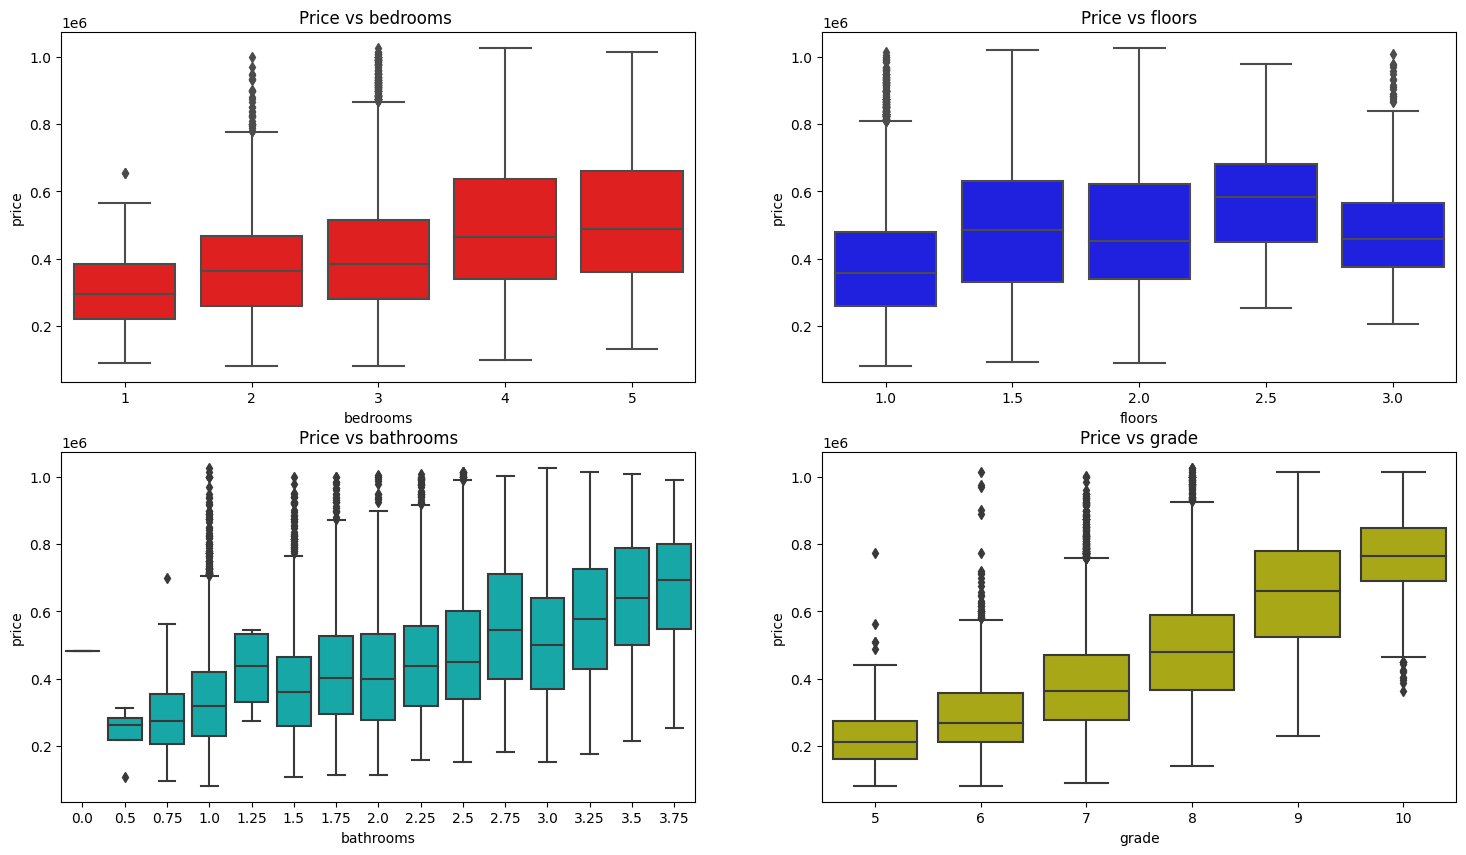

In [43]:
# check the percentile and median base distribution(For visulaising the outliers)
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=df, x=df["bedrooms"], y=df["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=df, x=df["floors"], y=df["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=df, x=df["bathrooms"], y=df["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=df, x=df["grade"], y=df["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")

plt.show()